In [3]:
#이전 과제 재활용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [4]:
data = pd.read_csv('PurchasesFINAL12312016.csv')
data.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


추정한 칼럼들 

InventoryId: 재고 고유 번호

Store: 매장 ID

Brand: 브랜드 ID

Description: 제품 설명

Size: 제품 크기

VendorNumber: 공급업체 ID

VendorName: 공급업체 이름

PONumber: 구매주문서 번호

PODate: 구매주문서 발행날짜

ReceivingDate: 제품수령 날짜

InvoiceDate: 송장발행 날짜

PayDate: 지불한 날짜

PurchasePrice: 제품 단가

Quantity: 구매 또는 수령된 수량 -> 수량으로 추정

Dollars: 총 거래 금액 [(제품 단가 * 수량)으로 가정)]

Classification: 분류 ID

C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 

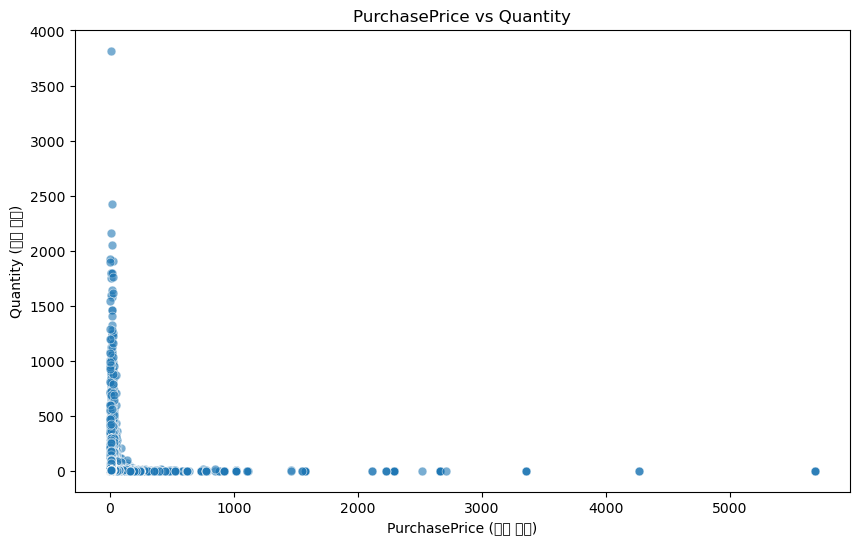

In [6]:
plt.figure(figsize=(10, 6))  #점이 몰려 있어 크기 수정, 단지 극단적이었을 뿐
sns.scatterplot(x='PurchasePrice', y='Quantity', data=data, alpha=0.6, s=40)
plt.title('PurchasePrice vs Quantity')
plt.xlabel('PurchasePrice')
plt.ylabel('Quantity')
plt.show()


구매단가와 구매 수량간의 관계를 시각화
- 눈에 띄는 건 단 하나, 1000이하의 단가를 형성하는 제품의 수량은 1000이상보다 월등한 우위를 보인다.

- 특정 가격대의 물건이 매장에 많이 주문되는 것은 회전률이 높다는 것을 의미하고, 고객들은 1000이하 가격의   상대적 저가 제품들을 선호하는것으로 판단된다.

- 롱테일 처럼 보이지만, 점의 빈도수를 보아 1000이상의 가격들의 수익량을 합쳐도 1000이하 가격대의 제품 판   매량과 회전률을 따라갈 수 없다고 판단된다. 따라서 의사결정자는 해당 매장의 가격전략을 수익으로 목표를   설정했다면, 저가 제품를 다수의 소비자에게 공략하는 전략을 구현해야 한다.

In [7]:
# 매출 = 단가 * 수량
data['Revenue'] = data['PurchasePrice'] * data['Quantity']

# 1000을 기준으로 + / - 비교
low_price_revenue = data[data['PurchasePrice'] <= 1000]['Revenue'].sum()
high_price_revenue = data[data['PurchasePrice'] > 1000]['Revenue'].sum()


print(f'1000 이하 제품의 총 수익: {low_price_revenue}')
print(f'1000 이상 제품의 총 수익: {high_price_revenue}')

# 전체 수익 = 1000이하 + 1000이상(이상과 이하라서 이하, 초과로 했으면 다른 결과가 나올수도 있으나 일단 진행)
total_revenue = low_price_revenue + high_price_revenue

# 비율 계산
low_price_percentage = (low_price_revenue / total_revenue) * 100
high_price_percentage = (high_price_revenue / total_revenue) * 100

print(f'1000 이하 제품의 수익 비율: {low_price_percentage:.2f}%')
print(f'1000 이상 제품의 수익 비율: {high_price_percentage:.2f}%')


1000 이하 제품의 총 수익: 321697530.66000015
1000 이상 제품의 총 수익: 203234.87
1000 이하 제품의 수익 비율: 99.94%
1000 이상 제품의 수익 비율: 0.06%


- 수치상으로도 1000이상 제품의 수익 비율은 99.94% 이며 전체로 봐도 무방하다.

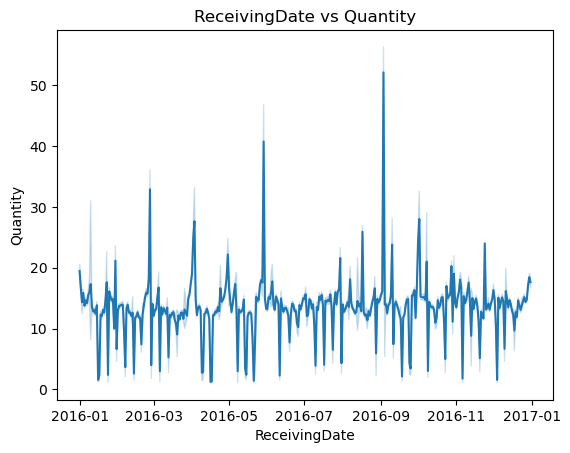

In [15]:
# 제품 수령 날짜와 수량 간의 관계 

data['PODate'] = pd.to_datetime(data['PODate'])

# 날짜별 수령한 수량의 분포 확인, #괜찮게 나오면 이전에 고려한 '이하와 초과' 범위의 선택지는 생략
sns.lineplot(x='ReceivingDate', y='Quantity', data=data)
plt.title('ReceivingDate vs Quantity')
plt.xlabel('ReceivingDate')
plt.ylabel('Quantity')
plt.show()

제품 수령 날짜와 구매 수량 관계를 시각화
(* 구매수량과 제품 수령은 비례하며, 이를 회전률이라고 가정)
- 3월, 7월, 9월의 높게 형성한 수량 상승폭을 제외하고 상승을 했다는 사실로 주목했을때, 전반적으로 일정 패턴을 가진것은 자명하다.

- 나중에 HBR파일에 표기하겠지만, 그 선을 기준으로 3월, 6월, 9월이 무엇을 시사하는지 주목해본다. 일반적으로, 기후와 관련이 높을 것이라 생각한다.

- 3월, 6월, 9월 이 세 달은 계절, 온도, 무드(분위기) 면으로 가장 극단적인 달이다. 그렇게 생각한 이유는 다음과 같다. 

- 3월(겨울의 끝, 시작의 달)

3월이 모든 시작의 달이라는것은 이견은 없을 것이다. 그러나, '시작의 달'이라는 단어가 과연 어느 연령대까지 적용되는가에 대한 논의를 해야 할 것이다.

10대: 삶의 구심점은 학교와 집단, 혹은 온라인이다. 보호자의 통제에 따라 온라인과 오프라인의 점유율은 달라       질수 있다. 

20대: 집안 수익에 따라 삶의 구심점이 학교일수도, 1용직 집단일 확률이 다수 존재한다. 온라인은 기본적으로       사용하지만 10대와의 차이는 온라인 세상 탐색의 자유로움에 있다.

20대(중반 ~ 후반): 상대적으로 완성된 자아를 기반으로 직장에 있을 확률과 취업준비생일 확률이 존재한다. 온                    라인에서의 그들의 알고리즘은 취업 시장과 이직 환경일 것이다.

30대: 삶의 구심점은 대부분 직장같은 외부에서 이뤄지며, 이들은 특별하게 공간으로 분류해야한다. 직장, 차         내부, 대중교통, 카페 등이 그 예가 될 수 있다고 판단된다. 

40대 ~ else: 소비의 방향이 본인 내부로 흐르는것이 아닌, 본인이 소유한 가족(혹은 집단), 재산 등의 유지와              투자로 가는 흐름을 봐야 한다. 온라인에서는 정치, 그리고 건강처럼 젊은 인구층에 손에 닿지 않는 곳이 그들의 소유가 될것이다.


온라인은 이제 가난한 자와 부유한 자들 모두 거주하는 하나의 장소가 되었기에, 교집합적인 부분이 다수인것을 감안해 오프라인으로만 환경을 제한하여 가정한다.

따라서 10대, 20대가 3월의 해당하는 가장 적합한 집단일 것이며 새로운 시작의 테마는 그들의 소유이기에 6월과 9월에 비해 상대적으로 구매 그래프가 적은 이유가 될것이다.

- 6월(휴일과 더위의 달)
지구 온난화 영향으로 극단적인 더위가 시작되는 주기이며 해가 지나갈수록 그 시기는 5월이 될수도 있다는 옵션을 추가로 감안해야 한다. 논점은, 대다수의 소비층이 더위라는 단어가 언급되는 달이 5월, 6월, 그리고 7월 중 어느 구간인지가 중요한 것이라 판단된다. 그 시작점을 잡아낸다면, 기대 수익을 이전보다 높일 수 있을것이다. 

- 9월(두번째 시작, 그리고 추위와 12월의 끝으로 가는 준비)

6월과 같은 스탠스를 취해야 하는것은 논리상 동일하다. 그러나, 전체 그래프 중 가장 높은 회전률을 보이기에, 그 요인에 대해 알아야 할것이다.

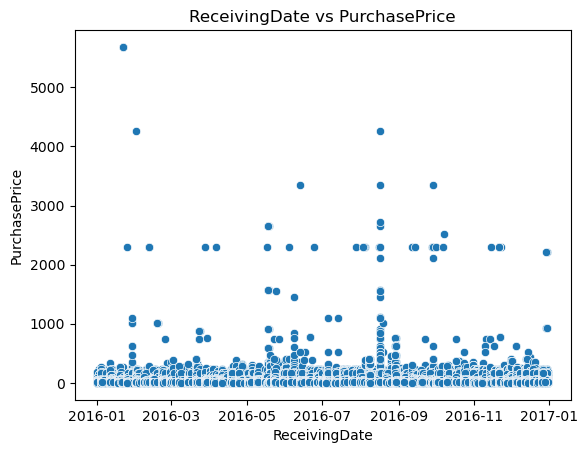

In [9]:
# 3. 구매 단가와 제품 수령 날짜 
sns.scatterplot(x='ReceivingDate', y='PurchasePrice', data=data)
plt.title('ReceivingDate vs PurchasePrice')
plt.xlabel('ReceivingDate')
plt.ylabel('PurchasePrice')
plt.show()


- 1000단위 줄을 수평으로 긋는다면, 저가 상품을 구매하는것을 압도적으로 선호한다는 사실은 위에 언급한 
  인사이트와 동일하다. 스킵해도 상관 없을것이다.

      Brand   Dollars  SalesPercentage
0        58   6811.52         0.009972
1        60    251.60         0.000368
2        61    763.20         0.001117
3        62  18234.12         0.026693
4        63  18336.92         0.026844
...     ...       ...              ...
7292  90085     47.72         0.000070
7293  90089   1402.56         0.002053
7294  90604   6273.60         0.009184
7295  90609   5440.00         0.007964
7296  90631   4586.40         0.006714

[7297 rows x 3 columns]


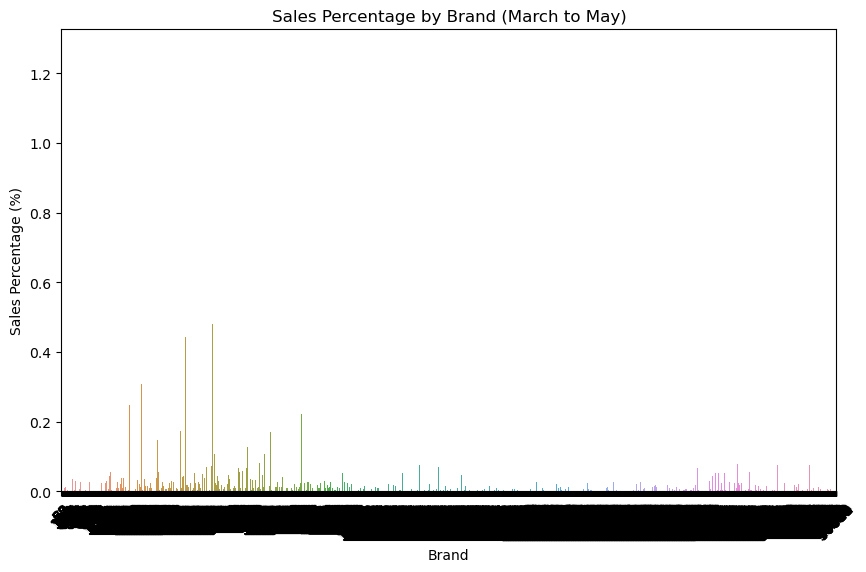

In [27]:
# 3월에서 5월까지의 데이터 필터링
march_to_may_data = data[(data['ReceivingDate'] >= '2016-03-01') & (data['ReceivingDate'] <= '2016-05-31')]

# 브랜드별 판매액(Dollars)의 합계 계산
brand_sales = march_to_may_data.groupby('Brand')['Dollars'].sum().reset_index()

# 브랜드별 판매액 비율 계산
total_sales = brand_sales['Dollars'].sum()
brand_sales['SalesPercentage'] = (brand_sales['Dollars'] / total_sales) * 100

# 브랜드별 판매율 출력
print(brand_sales)

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='SalesPercentage', data=brand_sales)
plt.title('Sales Percentage by Brand (March to May)')
plt.xlabel('Brand')
plt.ylabel('Sales Percentage (%)')
plt.xticks(rotation=45)
plt.show()


- 너무 많음, TOP 10으로 노선을 틀었다.

In [37]:
def top10_brands_by_sales_percentage(start_date, end_date, title):
    # 특정 기간 데이터 필터링
    period_data = data[(data['ReceivingDate'] >= start_date) & (data['ReceivingDate'] <= end_date)]
    
    # 브랜드별 판매액(Dollars)의 합계 계산
    brand_sales = period_data.groupby('Brand')['Dollars'].sum().reset_index()

    # 브랜드별 판매액 비율 계산
    total_sales = brand_sales['Dollars'].sum()
    brand_sales['SalesPercentage'] = (brand_sales['Dollars'] / total_sales) * 100

    # SalesPercentage가 높은 순으로 상위 10개 브랜드 추출
    top10_brands = brand_sales.sort_values(by='SalesPercentage', ascending=False).head(10)

    # Brand 번호를 실제 Description에서 브랜드명으로 변환
    top10_brands = pd.merge(top10_brands, data[['Brand', 'Description']].drop_duplicates(), on='Brand', how='left')

    # 실제 브랜드명 추가 (중복이 발견돼서 브랜드명을 소문자로 변환)
    top10_brands['BrandName'] = top10_brands['Description'].apply(lambda x: x.split()[0].lower())
    top10_brands = top10_brands.groupby('BrandName', as_index=False).agg({'SalesPercentage':'sum'}).sort_values(by='SalesPercentage', ascending=False)

    # 결과 출력
    print(f"\nTop 10 Brands by Sales Percentage ({title}):")
    print(top10_brands)

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(x='BrandName', y='SalesPercentage', data=top10_brands)
    plt.title(f'Top 10 Brands by Sales Percentage ({title})')
    plt.xlabel('Brand')
    plt.ylabel('Sales Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()



Top 10 Brands by Sales Percentage (March to May):
   BrandName  SalesPercentage
1       capt         1.262311
9     tito's         1.123281
0    absolut         1.032215
2       jack         0.962198
5      ketel         0.777352
8  tanqueray         0.648152
7   smirnoff         0.597220
3        jim         0.593606
6     patron         0.517521
4    kendall         0.511592


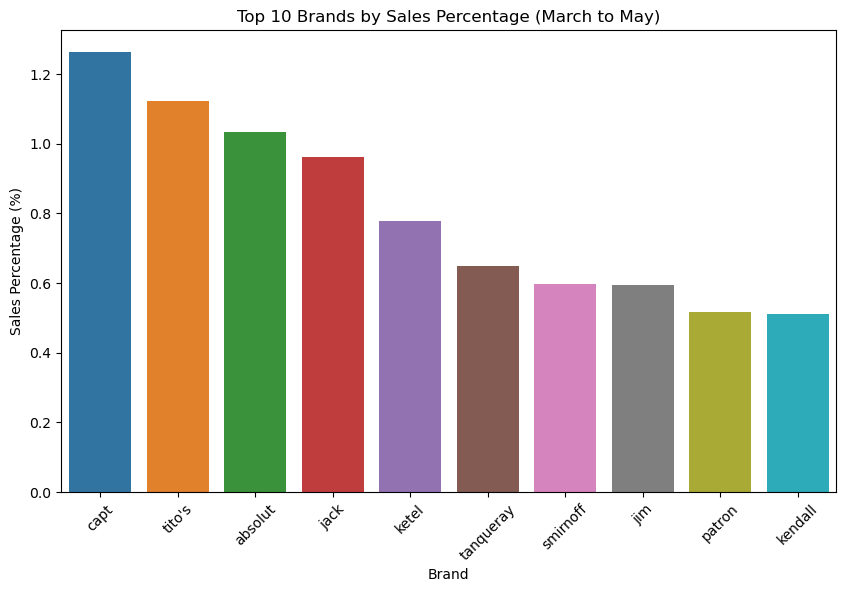

In [38]:
# 3 ~ 5월 
top10_brands_by_sales_percentage('2016-03-01', '2016-05-31', 'March to May')


Top 10 Brands by Sales Percentage (June to August):
   BrandName  SalesPercentage
5       jack         1.443637
9     tito's         1.431036
0    absolut         1.382589
4       grey         1.216143
3       capt         1.115342
6      ketel         1.020360
7   smirnoff         0.785478
8  tanqueray         0.712789
1    bacardi         0.702934
2     bombay         0.591049


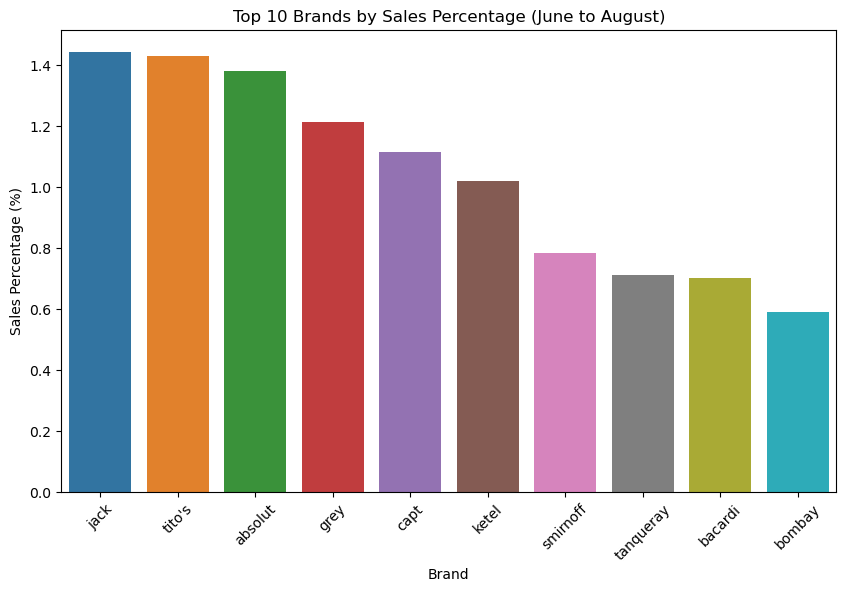

In [39]:
# 6 ~ 8월
top10_brands_by_sales_percentage('2016-06-01', '2016-08-31', 'June to August')


Top 10 Brands by Sales Percentage (September to November):
  BrandName  SalesPercentage
6   johnnie         1.510460
2      capt         1.289084
4      jack         1.151113
8    tito's         1.095573
7     ketel         0.980143
0   absolut         0.966231
5   jameson         0.894615
1   baileys         0.685333
3      grey         0.662056


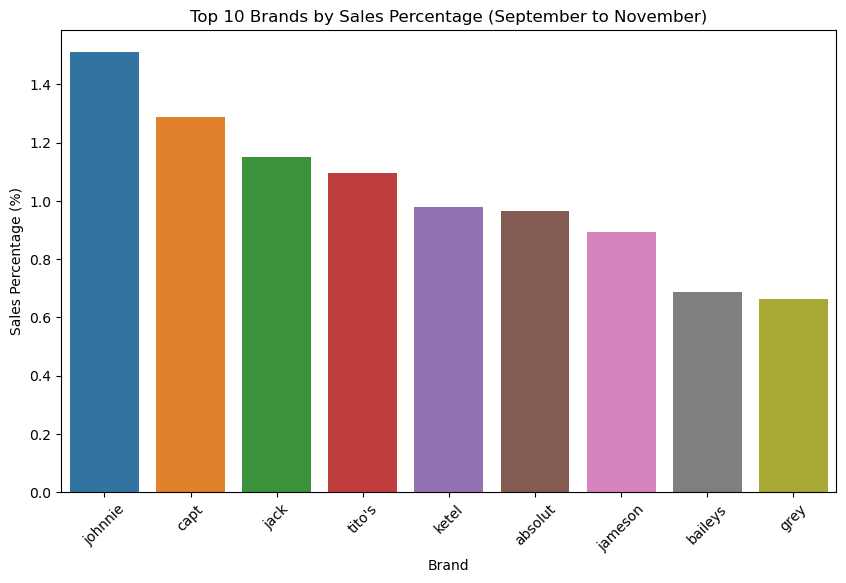

In [40]:
# 9 ~ 11월, 아마 중복이 있어서 9위만 반영된듯
top10_brands_by_sales_percentage('2016-09-01', '2016-11-30', 'September to November')

순위 다시 표기(높은순으로) / 의도: 중복식별 목표

(Case A_Standard): 3월 ~ 5월             

1. Capt
2. Tito's
3. Absolut
4. Jack
5. Ketel
6. Tanqueray
7. Smirnoff
8. Jim
9. Patron
10. Kendall

(Case B): 6월 ~ 8월

1. Jack (A 중복 - 4위, 순위 상승)
2. Tito's (A 중복 - 2위, 순위 유지)
3. Absolut (A 중복 - 3위, 순위 유지)
4. Grey (New, 10위 중 4위로 궤도 상승)
5. Capt (A 중복 - 1위, 순위 하락)
6. Ketel (A 중복 - 5위, 순위 하락)
7. Smirnoff (A 중복 - 7위, 순위 유지)
8. Tanqueray (A 중복 - 6위, 순위 하락)
9. Bacardi (New, 10위 중 9위로 궤도 상승)
10. Bombay (New, 10위 중 10위로 궤도 상승)

(Case C): 9월 ~ 11월

1. Johnnie (New, 10위 중 1위로 궤도 상승)
2. Capt (A 중복 - 1위, 순위 하락)
3. Jack (B 중복 - 1위, 순위 하락)
4. Tito's (A 중복 - 2위, 순위 하락)
5. Ketel (A 중복 - 5위, 순위 유지)
6. Absolut (A 중복 - 3위, 순위 하락)
7. Jameson (New, 10위 중 7위로 궤도 상승)
8. Baileys (New, 10위 중 8위로 궤도 상승)
9. Grey (B 중복 - 4위, 순위 하락)

주목해야하는 브랜드

1. Capt Morgan Spiced Rum

3월 ~ 5월: 1위
6월 ~ 8월: 5위
9월 ~ 11월: 2위

주목할 점: 중간에 4계단 하락했지만, 하반기에 다시 2위까지 올라간 강력한 브랜드라 판단된다.

2. Jack Daniels No 7 Black
3월 ~ 5월: 4위
6월 ~ 8월: 1위
9월 ~ 11월: 3위

주목할 점: 지속적으로 상위권 유지, 특히 6월 ~ 8월에 1위를 기록한 것을 주목. 3개의 시즌에서 상위권을 유지했다.

3. Tito's Handmade Vodka
3월 ~ 5월: 2위
6월 ~ 8월: 2위
9월 ~ 11월: 4위

주목할 점: 전 시즌에서 2~4위를 유지하는 효자 상품. 시즌에 관계없이 꾸준히 잘 팔리는 브랜드라 판단된다.

4. Absolut (첫 글자가 Absolut인 상품이 너무 많지만, 실력차이로 세세하게 구별은 못했음, 그럼에도 Absolut상품 중 하나인 것은 자명함)

3월 ~ 5월: 3위
6월 ~ 8월: 3위
9월 ~ 11월: 6위

주목할 점: 상위권에 꾸준히 위치했지만 마지막 시즌에서 약간의 순위 하락(3계단 하락)이 있다. 그럼에도 Top10 안에 유지된것은 분명하다. 

5. Ketel One Vodka

3월 ~ 5월: 5위
6월 ~ 8월: 6위
9월 ~ 11월: 5위

주목할 점: 꾸준히 중상위권을 유지하는 눈여겨 봐야 하는 브랜드다.

새롭게 궤도에 올라온 브랜드

1.  Grey ( Absolut와 마찬가지며, 정확히 Grey Goose 시리즈중 하나인것으로 판단된다.)

6월 ~ 8월: 4위로 첫 등장.
9월 ~ 11월: 9위로 하락.

주목할 점: 6월 ~ 8월에 강하게 떠올랐다가 9월 ~ 11월에 하락세, 단기적인 성과를 내고 서서히 감소세를 보인다.

3. BACARDI USA INC            

6월 ~ 8월: 9위로 첫 등장.
9월 ~ 11월: 상위권에서 제외됨.

주목할 점: Grey와 마찬가지로 특정 시점에 판매가 집중되다가 사라짊.

4. Jameson (마찬가지, Jameson 시리즈이다. 이하 생략)

9월 ~ 11월: 6위로 첫 등장.

주목할 점: 9월 ~ 11월에 새롭게 등장하며 빠르게 상위권으로 진입했다. 하반기에 강한 성과를 보인 브랜드로 보였고, 향후 성과를 모니터링 해야 한다.

5. Johnnie (마찬가지, Johnnie Walker 시리즈이다. 이하 생략)

9월 ~ 11월: 1위로 첫 등장

주목할 점: 9월 ~ 11월에 동시에 새롭게 최상위권에 진입한 브랜드. 하반기 특정 이벤트나 트렌드에 따라 빠르게 떠오른 브랜드로 보여 Jameson과 동일한 무브먼트로 취급해야 한다.

6. Baileys (마찬가지, Baileys 시리즈이다. 이하 생략)

9월 ~ 11월: 8위로 첫 등장.

주목할 점: 9월 ~ 11월에 새롭게 등장한 브랜드, Jameson과 Johnnie같은 두 브랜드와 동일한 움직임을 보인다.

봄 시즌 이후 사라지는 브랜드들도 있지만, 하락하는 브랜드에 주목하기보단, 새롭게 궤도에 오르거나 꾸준한 판매를 보이는 브랜드들이 더 중요하다고 판단했다. 




제품을 자세히 안본 결과 -> 정확히는 음주 자체를 안해서 이름을 봤을때 바로 파악하지 못한 죄, 사실 Size에 표기량만 봤더라도 액체인것을 확인했을텐데 이름에만 주목했다.

주류 상품인것을 파악했으니, 이전에 가정했던 10대는 전혀 고려할 대상이 아니거나, 10대가 매체에 노출되어 앞으로 성인이 되었을때의 잠재고객 대상자가 될 수 있지만, 해당 술은 양주이기에 한국에서는 10대 잠재 고객을 고려할 이유가 없다.

시각화를 보더라도, 가격적으로 술이라는 소비상품에 10만원 이상을 구매하는 것은 소비자에게 적지 않은 부담을 끼치는것이 사실이다. 따라서, 각 주률 시장이 고객에게 다양하게 접근하려면, 진입장벽을 낮추기 위한 저렴한 제품 출시가 첫번째 발걸음이 될것이다. 비슷하게, 테슬라는 고급 차량을 먼저 출시하면서 높은 가격을 책정한 후, 나중에 보다 저렴한 모델을 출시하여 더 많은 소비자가 접근할 수 있도록 한 사례가 있다. 기업이 소비자에게 원하는 것은 단 하나, '작게 한번 시작해볼까?'심리의 유도가 필요하다.

두번째로, '저가 제품를 다수의 소비자에게 공략하는 전략을 구현해야 한다.'라고 제안한것은 분명 맞다고 생각하지만, 지금 이 데이터가 주류데이터라는 것을 알았기에, 고가의 주류는 반드시 존재해 소비자의 이목을 이끌어야 한다. 이전 주류문화는, 취하기 위해서 상품을 구매하는 경우가 대부분의 소비문화였지만 현재는 고가의 주류 상품을 향후 저가 전략으로 주류문화에 자연스럽게 녹아든 소비자의 최종 목표(아무나 마시지 못한 고급 술을 내가 언젠간 소유하겠다.)가 되어야 할것이다. 소유라고 언급한 이유는, 현대 주류 상품은 그 병조차 고가로 매겨지는 가치를 지니기에, 소장하는 술의 가치가 그들의 입장에서 충분한 가치를 지닐것이라 판단한다. 한문장으로 정리하면, 긴 호흡으로 미래 가치에 투자하는 전략이 필요하다. 